In [31]:
import pandas as pd
from sklearn import model_selection
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [18]:
df_heart.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### Exploration

In [19]:
print(df_heart.isna().sum())
print(df_heart.info())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float

In [20]:
#There's no missing value in this dataset

In [41]:
print(df_heart.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [71]:
bool_features = df_heart[['anaemia', 'smoking', 'sex', 'diabetes', 'high_blood_pressure', 'DEATH_EVENT']]
con_features = df_heart[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets'
                       ,'serum_creatinine', 'serum_sodium', 'time']]

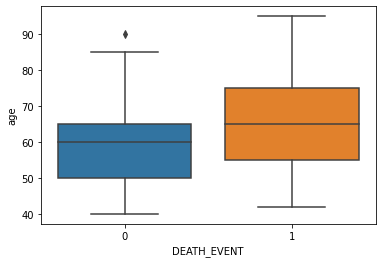

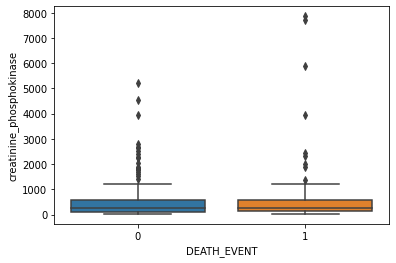

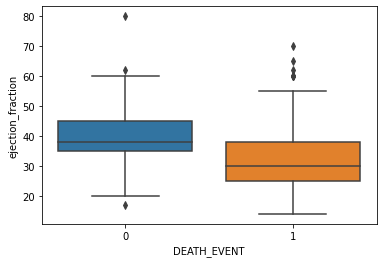

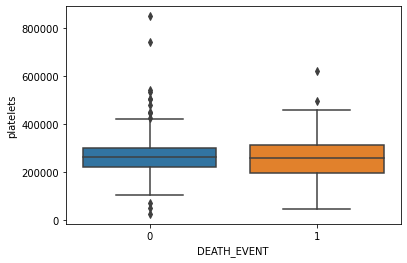

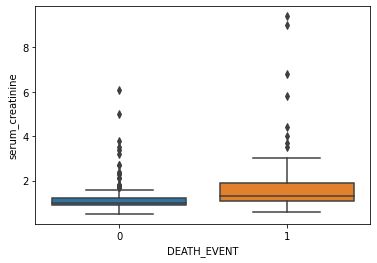

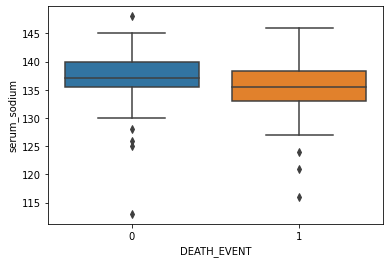

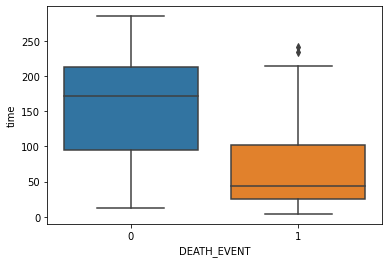

In [66]:
for i in con_features:
    sns.boxplot(x=df_heart.loc[:,'DEATH_EVENT'], y=df_heart.loc[:,i])
    plt.ylabel(str(i))
    plt.show()

In [72]:
res = bool_features.groupby(['DEATH_EVENT']).sum()
res = res.reset_index()
res

,DEATH_EVENT,anaemia,smoking,sex,diabetes,high_blood_pressure
0,0,83,66,132,85,66
1,1,46,30,62,40,39


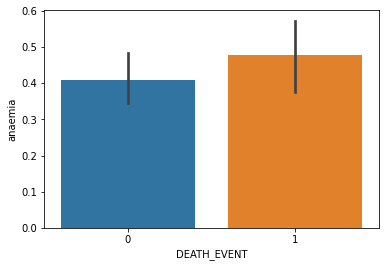

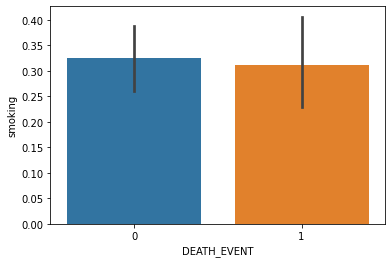

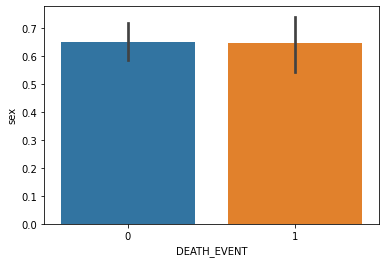

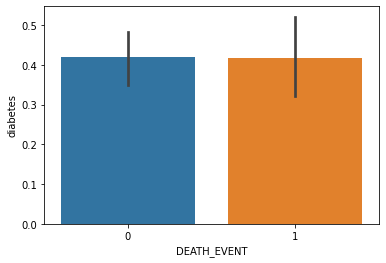

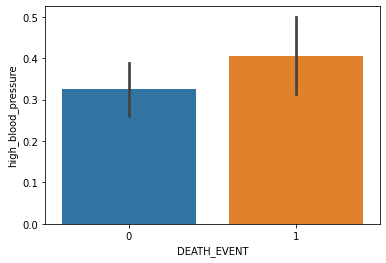

In [129]:
for i in bool_features:
    if (i != 'DEATH_EVENT'):
        sns.barplot(x=df_heart.loc[:,'DEATH_EVENT'], y=df_heart.loc[:,i])
        plt.ylabel(str(i))
        plt.show()

### Extracting Features 

In [22]:
x = df_heart.loc[:, 'age':'time'].values
y = df_heart.loc[:, ['DEATH_EVENT']].values

In [23]:
#split train test set to 20:80
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, 
                                                                   test_size = 0.2, random_state=0)

In [24]:
def svm_model(k, c, x, y):
    model = svm.SVC(kernel=k, C=c).fit(x, y)
    return model
    

In [25]:
model_1_linear = svm_model('linear', 1, x_train, y_train.ravel())
model_2_poly = svm_model('poly', 1, x_train, y_train.ravel())
model_3_rbf = svm_model('rbf', 1, x_train, y_train.ravel())
model_4_sigmoid = svm_model('sigmoid', 1, x_train, y_train.ravel())

In [26]:
print(str('Linear Model Score : ') + str(model_1_linear.score(x_test, y_test)))
print(str('Poly Model Score : ') + str(model_2_poly.score(x_test, y_test)))
print(str('RBF Model Score : ') + str(model_3_rbf.score(x_test, y_test)))
print(str('Sigmoid Model Score : ') + str(model_4_sigmoid.score(x_test, y_test)))

Linear Model Score : 0.7666666666666667
Poly Model Score : 0.6166666666666667
RBF Model Score : 0.6166666666666667
Sigmoid Model Score : 0.6166666666666667


### Hyper Parameter Tuning

In [4]:
#testing different parameters to see which can create the best model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [27]:
param_grid = {'C':[0.1,1,50], 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(x_train, y_train.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 50],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [30]:
print(grid.best_params_)
print(grid.score(x_test, y_test))

{'C': 1, 'kernel': 'linear'}
0.7666666666666667
